<a href="https://colab.research.google.com/github/speedshi/quakephase/blob/main/use_quakephase_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an example Jupyter Notebook to run quakephase for getting seismic phase picks and phase probabilities.  
You can run this Jupyter Notebook on Google Colab.

In [ ]:
# This code is necessary on colab to install quakephase. If quakephase is already installed on your machine, you can skip this.
!pip install quakephase

In [ ]:
# This code is necessary on colab to download necessary example data and parameter file.
# If you have your own data and parameter file, you can skip this.
!wget https://raw.githubusercontent.com/speedshi/quakephase/main/parameters.yaml
!mkdir example_data_2
!wget -P example_data_2 https://raw.githubusercontent.com/speedshi/quakephase/main/example_data_2/example_2C_LAK24_2.MSEED

In [1]:
# Load quakephase and importe the required libraries
from quakephase import quakephase
from quakephase.utilplot import waveform_pick_1sta

#### Example 1: load seismic data stored locally and apply quakephase to obtain P and S picks and probabilities

In [2]:
from obspy import read

# read seismic data stored locally
stream = read("./example_data_2/*")

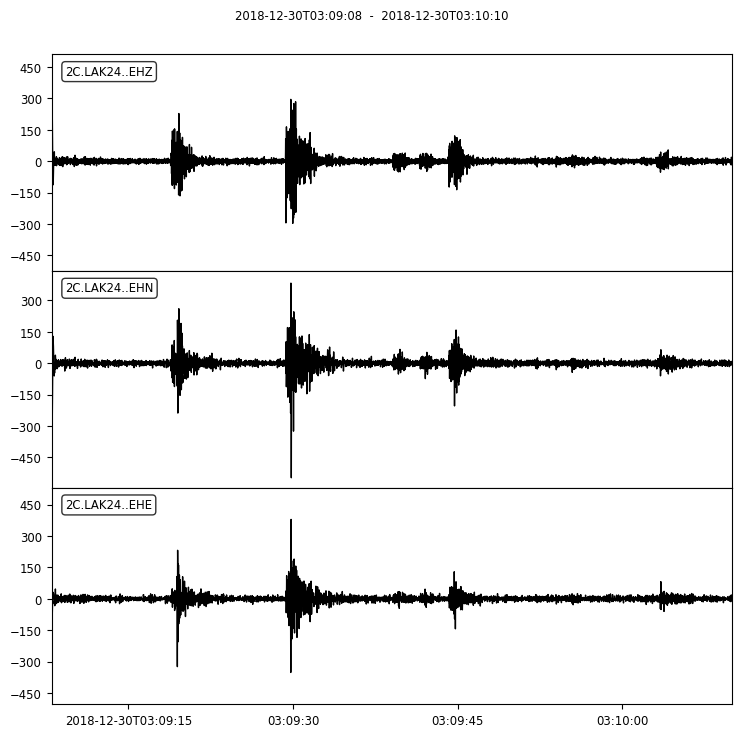

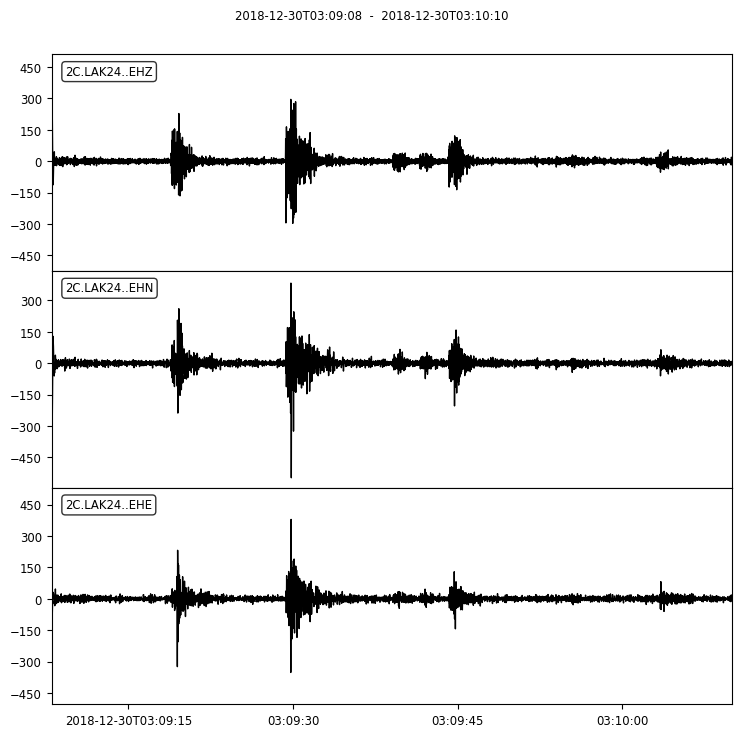

In [3]:
# plot waveforms
st = stream.copy().filter('bandpass', freqmin=5, freqmax=45)
st.plot()

In [4]:
# apply quakephase to get P and S picks and probabilities
output = quakephase.apply(stream, file_para='./parameters.yaml')

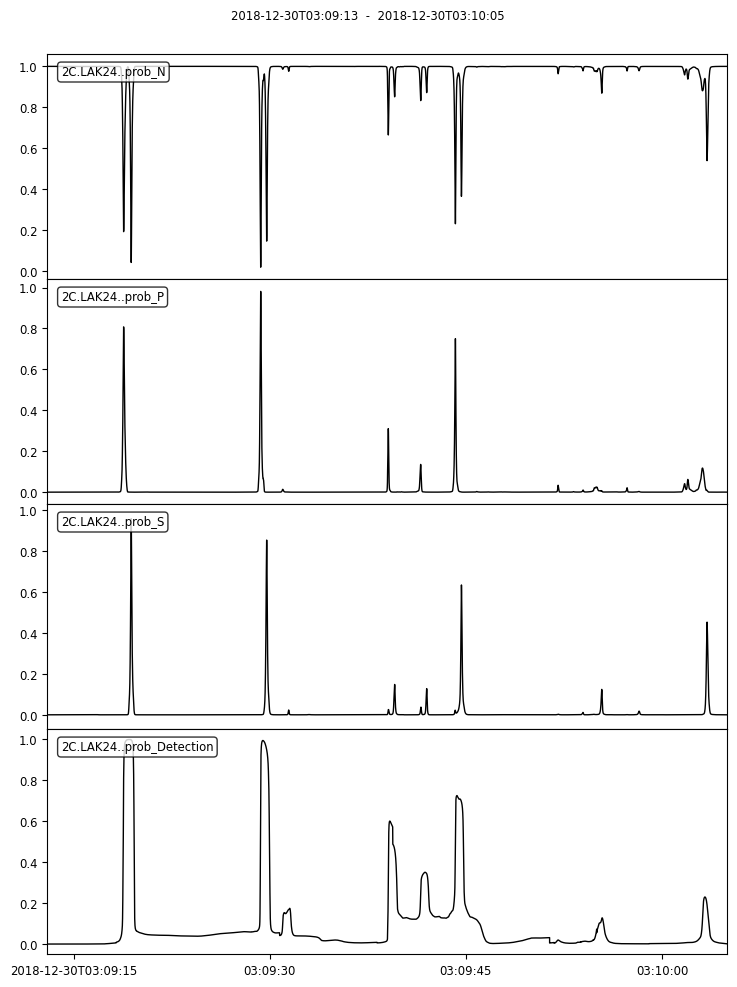

     trace_id                   start_time                     end_time  \
0   2C.LAK24.  2018-12-30T03:09:18.700000Z  2018-12-30T03:09:19.006000Z   
1   2C.LAK24.  2018-12-30T03:09:19.274000Z  2018-12-30T03:09:19.558000Z   
2   2C.LAK24.  2018-12-30T03:09:29.184000Z  2018-12-30T03:09:29.442000Z   
3   2C.LAK24.  2018-12-30T03:09:29.642000Z  2018-12-30T03:09:29.906000Z   
4   2C.LAK24.  2018-12-30T03:09:39.010000Z  2018-12-30T03:09:39.112000Z   
5   2C.LAK24.  2018-12-30T03:09:39.510000Z  2018-12-30T03:09:39.582000Z   
6   2C.LAK24.  2018-12-30T03:09:41.506000Z  2018-12-30T03:09:41.568000Z   
7   2C.LAK24.  2018-12-30T03:09:41.972000Z  2018-12-30T03:09:42.024000Z   
8   2C.LAK24.  2018-12-30T03:09:44.084000Z  2018-12-30T03:09:44.286000Z   
9   2C.LAK24.  2018-12-30T03:09:44.556000Z  2018-12-30T03:09:44.768000Z   
10  2C.LAK24.  2018-12-30T03:09:55.362000Z  2018-12-30T03:09:55.410000Z   
11  2C.LAK24.  2018-12-30T03:10:03.028000Z  2018-12-30T03:10:03.164000Z   
12  2C.LAK24.  2018-12-30

In [5]:
# print/save the pick and probability
output['prob'].plot()
print(output['pick'])
output['pick'].to_csv('pick.csv', index=False)

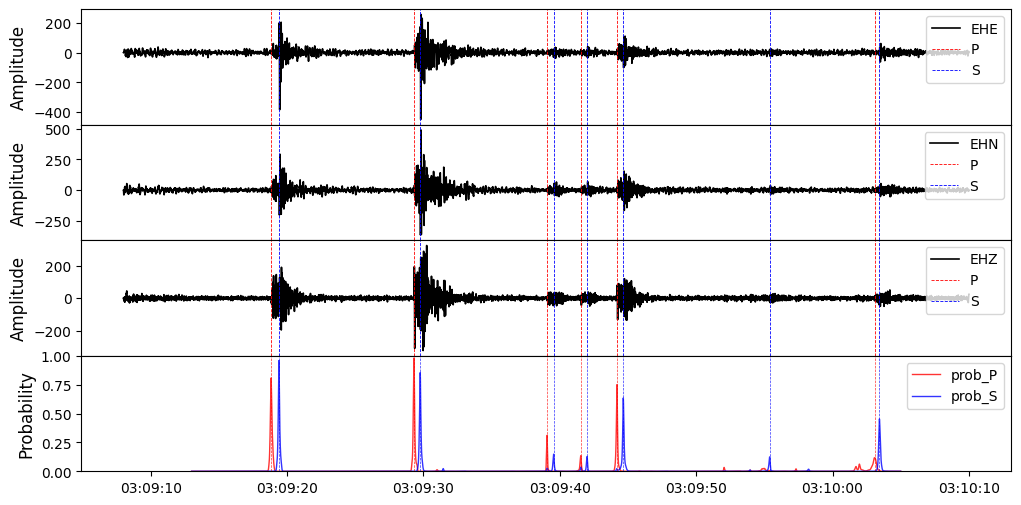

In [6]:
# visualize together with phase picks and probabilities
waveform_pick_1sta(stream=stream, pick=output['pick'], prob=output['prob'], fband=[2, 40])

#### Example 2: load seismic data from online data center and apply quakephase to obtain P and S picks and probabilities

In [7]:
from obspy.clients.fdsn import RoutingClient
from obspy import UTCDateTime

In [8]:
# request seismic data from data center
client = RoutingClient("iris-federator")
starttime = UTCDateTime("2024-01-04 06:33:00")
endtime = UTCDateTime("2024-01-04 06:46:00")
stream = client.get_waveforms(network="CH", station="HASLI", location="*", channel="HH?", starttime=starttime, endtime=endtime)

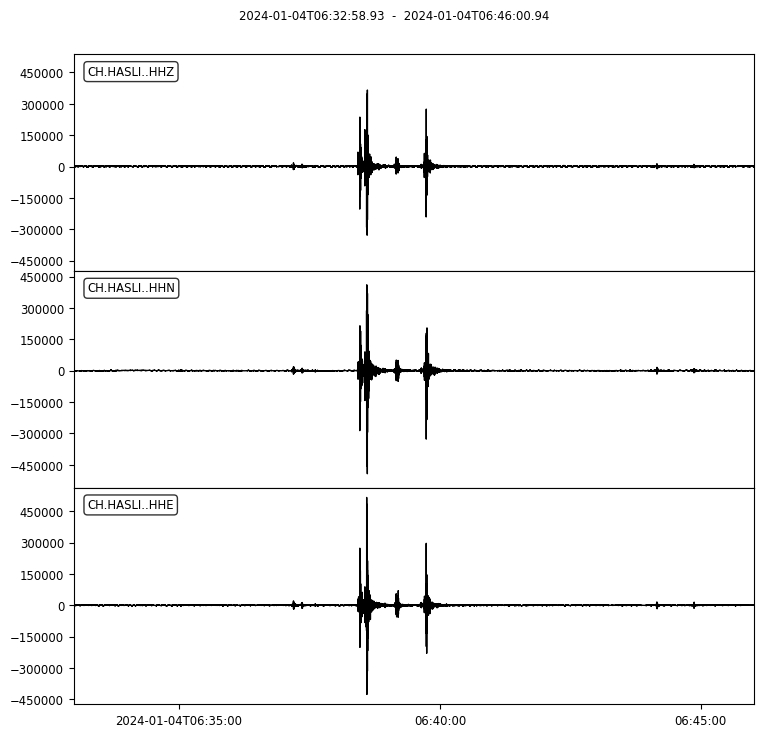

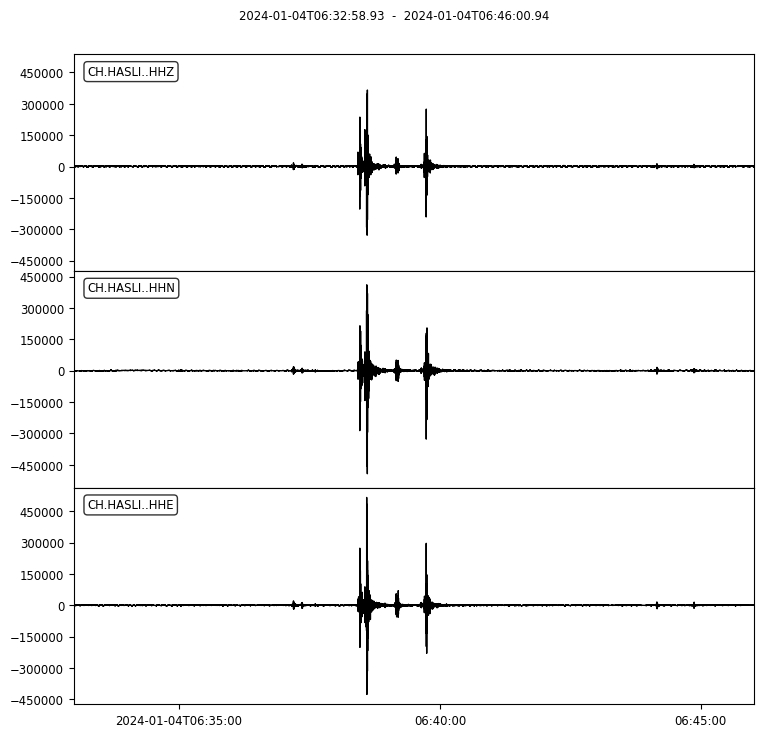

In [9]:
# plot waveforms
stream.plot()

In [10]:
# apply quakephase to get P and S picks and probabilities
output = quakephase.apply(stream, file_para='./parameters.yaml')

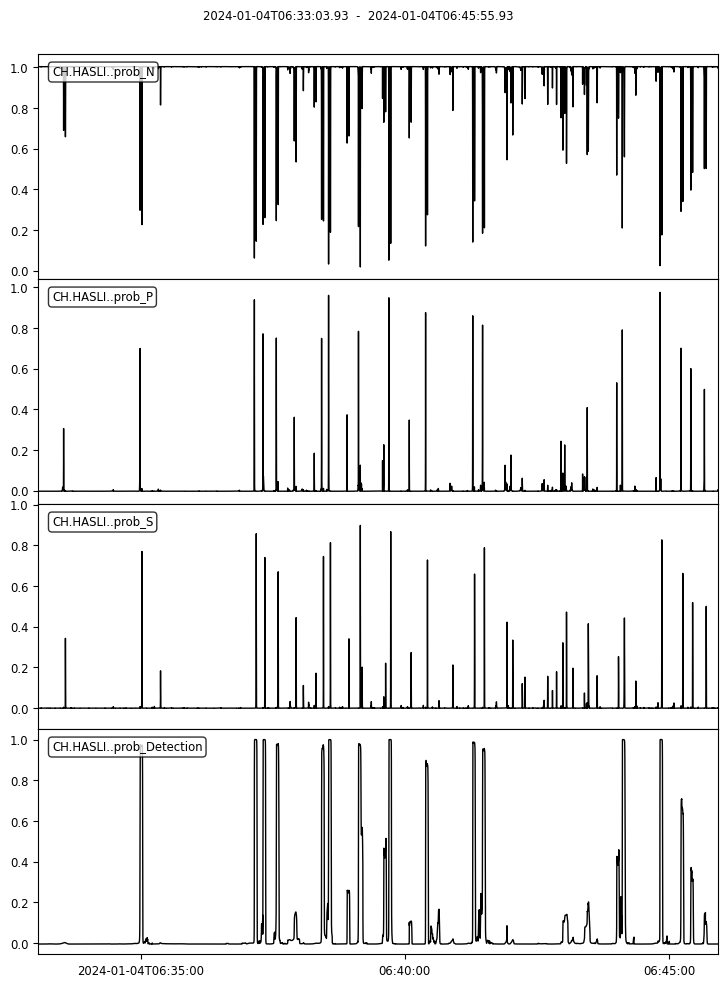

     trace_id                   start_time                     end_time  \
0   CH.HASLI.  2024-01-04T06:33:32.518000Z  2024-01-04T06:33:32.732000Z   
1   CH.HASLI.  2024-01-04T06:33:34.542000Z  2024-01-04T06:33:34.838000Z   
2   CH.HASLI.  2024-01-04T06:34:59.186000Z  2024-01-04T06:34:59.592000Z   
3   CH.HASLI.  2024-01-04T06:35:01.338000Z  2024-01-04T06:35:01.724000Z   
4   CH.HASLI.  2024-01-04T06:35:22.588000Z  2024-01-04T06:35:22.736000Z   
..        ...                          ...                          ...   
64  CH.HASLI.  2024-01-04T06:45:15.454000Z  2024-01-04T06:45:15.816000Z   
65  CH.HASLI.  2024-01-04T06:45:24.524000Z  2024-01-04T06:45:24.826000Z   
66  CH.HASLI.  2024-01-04T06:45:26.588000Z  2024-01-04T06:45:26.928000Z   
67  CH.HASLI.  2024-01-04T06:45:39.942000Z  2024-01-04T06:45:40.210000Z   
68  CH.HASLI.  2024-01-04T06:45:42.032000Z  2024-01-04T06:45:42.350000Z   

                      peak_time  peak_value phase  
0   2024-01-04T06:33:32.622000Z    0.305325    

In [11]:
# print/save the pick and probability
output['prob'].plot()
print(output['pick'])
output['pick'].to_csv('pick.csv', index=False)

/home/shipe/anaconda3/envs/quakephase/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


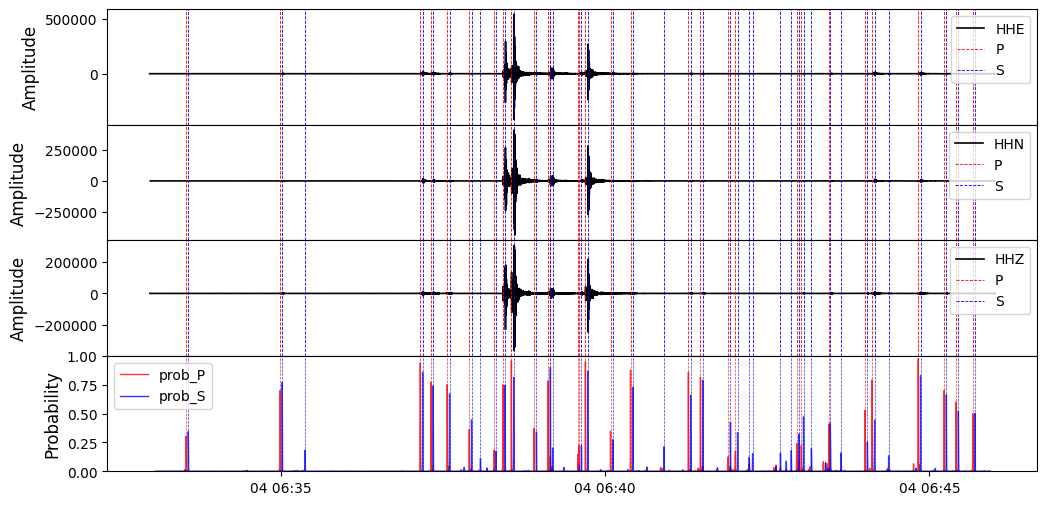

In [12]:
# visualize together with phase picks and probabilities
waveform_pick_1sta(stream=stream, pick=output['pick'], prob=output['prob'], fband=[2, 20])